In [19]:
# -*- coding: utf-8 -*
import pandas as pd
import numpy as np
import nltk 
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

train = pd.read_csv("train.txt", header=None, names=['word','y'], encoding='utf-8')
test = pd.read_csv("test.txt", header=None, names=['word'], encoding='utf-8')
# linear_ans_example = pd.read_csv("linear_ans_example.txt")

In [20]:
train.head()

,word,y
0,Аалтонен,1
1,Аар,0
2,Аарон,0
3,ААРОН,0
4,Аарона,0


In [47]:
train['word'] = train['word'].apply(unicode.lower)
test['word'] = test['word'].apply(unicode.lower)
train.sample(frac=1.0).head()
test.sample(frac=1.0).head()

,word
49178,зарина
51653,зюйду
55833,иранисты
165373,убывания
136512,ресторанчиков


In [23]:
train.head()

,word,y
0,аалтонен,1
1,аар,0
2,аарон,0
3,аарон,0
4,аарона,0


In [24]:
y = []
for i in range(len(train[y])):
    if (train['y'][i] == 0):
        y.append(-1)
    else:
        y.append(1)

In [25]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', binary=True, ngram_range=(1,6), 
                                   min_df=1)
counts = ngram_vectorizer.fit_transform(train['word'])
len(ngram_vectorizer.get_feature_names())

354113

In [27]:
matrix = ngram_vectorizer.transform(test['word'])

In [102]:
c_array = np.linspace(0.1, 1, 11)
c_array

array([ 0.1 ,  0.19,  0.28,  0.37,  0.46,  0.55,  0.64,  0.73,  0.82,
        0.91,  1.  ])

In [103]:
%%time
roc = []
for i in c_array:
    algo = LogisticRegression(penalty='l1', C=i)
    algo.fit(counts, y)
    roc.append(cross_val_score(algo, counts, y, scoring="roc_auc", cv=cv).mean())
    %time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs
CPU times: user 5min 41s, sys: 8.06 s, total: 5min 49s
Wall time: 5min 54s


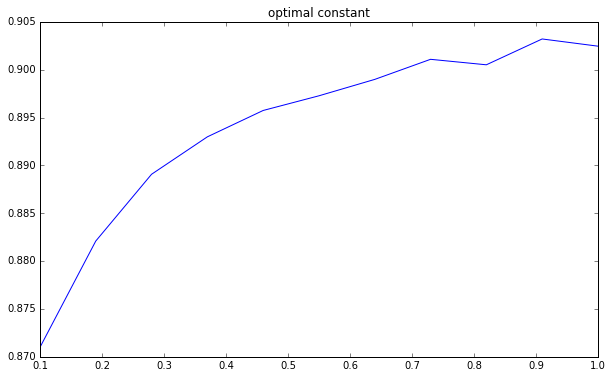

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

r = np.array(roc)
x = np.arange(20)
plt.figure(figsize=(10, 6))
plt.plot(c_array, roc)
plt.title(u'optimal constant')
plt.show()

In [105]:
max(roc)

0.90322622902072869

In [97]:
algo = LogisticRegression(penalty='l1', C=c_array[np.array(roc).argmax()])
algo.fit(counts, y)
cv=StratifiedKFold(shuffle = True)
print (cross_val_score(algo, counts, y, scoring="roc_auc", cv=cv).mean())

0.913774688276


In [45]:
matrix

<188920x354113 sparse matrix of type '<type 'numpy.int64'>'
	with 8274431 stored elements in Compressed Sparse Row format>

In [98]:
predictions = algo.predict_proba(matrix)
predictions = predictions.argmax(axis=1)

In [99]:
linear_ans_example = pd.DataFrame({"Id":list(range(len(predictions))), "Answer":predictions})

In [80]:
linear_ans_example.head()

,Answer,Id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [100]:
linear_ans_example.to_csv("linear_ans_example.txt", sep=',', index=False)